In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.shape

(41188, 21)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [6]:
#Data preprocessing:
#Use LabelEncoder to convert the label into numbers.
#Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
#Column "duration" must be deleted
#Check if there are any missing values in the dataset. If there are, drop the rows.
#Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset
#(i.e., divide the number of instances of the minority class by the total length of the dataframe).

In [7]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
#label encoder
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

In [9]:
# one hot encoding
df_dummies = pd.get_dummies(df)

In [10]:
# to display all columns
pd.options.display.max_columns = None

In [11]:
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [12]:
#deleting duration column
df_dummies.drop(columns=['duration'],axis=1,inplace=True)

In [13]:
#Check if there are any missing values in the dataset. If there are, drop the rows.
if df_dummies.isnull().sum().sum() == 0:
    print('There are no missing values')
else:
    print('There are missing values')

There are no missing values


In [14]:
df_dummies.shape

(41188, 63)

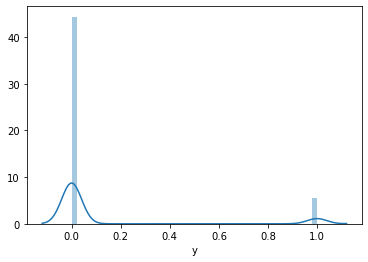

In [15]:
#Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset 
#(i.e., divide the number of instances of the minority class by the total length of the dataframe).

sns.distplot(df['y'])
plt.show()

In [16]:
#imbalance
(df.y.value_counts()[1]/df.shape[0]) * 100

11.265417111780131

In [17]:
#seperating X and y
X = df_dummies.drop(columns=['y'],axis=1)
y = df_dummies['y']
print(X.shape)
print(y.shape)

(41188, 62)
(41188,)


In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32950, 62)
(32950,)
(8238, 62)
(8238,)


In [19]:
#Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 
#trees and depth=3. Ensure you're using an appropriate metric (print sorted(sklearn.metrics.SCORERS.keys()) 
#to see what are the valid options and choose one for cross-validation).

RFC = RandomForestClassifier(n_estimators=100, max_depth=3)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [20]:
print(metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [21]:
scores = cross_val_score(RFC, X, y, cv=10)
print(scores)

[0.8873513  0.8873513  0.8873513  0.8873513  0.8873513  0.8873513
 0.8873513  0.39354212 0.88829529 0.37785333]


In [22]:
dummy = DummyClassifier()

In [23]:
dummy.fit(X_train, y_train)

DummyClassifier()

In [24]:
dummy.score(X_train, y_train)

0.8873444613050075

In [37]:
dummy_pred_train = dummy.predict(X_train)
dummy_pred_test = dummy.predict(X_test)
print(metrics.classification_report(y_train, dummy_pred_train))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29238
           1       0.00      0.00      0.00      3712

    accuracy                           0.89     32950
   macro avg       0.44      0.50      0.47     32950
weighted avg       0.79      0.89      0.83     32950



C:\Users\Darshan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darshan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darshan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print(metrics.classification_report(y_test, dummy_pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



C:\Users\Darshan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darshan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darshan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
model = RandomForestClassifier()

In [26]:
grid = {'n_estimators':[100,200], 'max_features':[7,8,9], 'max_depth':[3,4]}

In [27]:
grid_model = GridSearchCV(estimator=model, param_grid=grid)

In [28]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4], 'max_features': [7, 8, 9],
                         'n_estimators': [100, 200]})

In [29]:
grid_model.best_params_

{'max_depth': 4, 'max_features': 9, 'n_estimators': 100}

In [34]:
#Feature Importance
(pd.DataFrame(RFC.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)).head(3)

,Imp
nr.employed,0.180269
euribor3m,0.165643
poutcome_success,0.126133


# Quiz

In [35]:
RFC_1 = RandomForestClassifier(n_estimators=100, max_depth=3)# random_state=60)
RFC_1.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [39]:
rfc1_train_ypred = RFC_1.predict(X_train)
rfc1_test_ypred = RFC_1.predict(X_test)

In [40]:
print(metrics.classification_report(y_train, rfc1_train_ypred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     29238
           1       0.75      0.15      0.25      3712

    accuracy                           0.90     32950
   macro avg       0.82      0.57      0.60     32950
weighted avg       0.88      0.90      0.87     32950



In [41]:
print(metrics.classification_report(y_test, rfc1_test_ypred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7310
           1       0.73      0.17      0.28       928

    accuracy                           0.90      8238
   macro avg       0.82      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



In [42]:
# Q6
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32950, 62)
(32950,)
(8238, 62)
(8238,)


In [45]:
scoring = {'f1_score' : metrics.make_scorer(metrics.f1_score)}

In [46]:
RFC_2 = RandomForestClassifier(n_estimators=100, max_depth=6)
RFC_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [48]:
f1_score = cross_val_score(RandomForestClassifier(n_estimators=300, max_depth=6), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.25217391 0.31263383 0.22666667 0.28820961 0.23788546 0.31168831
 0.38854806 0.25382932 0.26754386 0.28085106]
F1 average score: 0.28


In [49]:
f1_score = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=3), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.21218962 0.25950783 0.20909091 0.23502304 0.20909091 0.17307692
 0.34689507 0.22222222 0.25777778 0.24669604]
F1 average score: 0.24


In [50]:
f1_score = cross_val_score(RandomForestClassifier(n_estimators=300, max_depth=6, random_state=60), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.25596529 0.30172414 0.22321429 0.29067245 0.23399558 0.31034483
 0.39837398 0.25877193 0.27510917 0.27777778]
F1 average score: 0.28


In [53]:
model1 = RandomForestClassifier(n_estimators=400, max_depth=8, random_state=60)

In [55]:
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=400, random_state=60)

In [56]:
#Feature Importance
(pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

,Imp
nr.employed,0.154584
euribor3m,0.145614
pdays,0.109492
poutcome_success,0.085388
emp.var.rate,0.080865
...,...
housing_unknown,0.001020
job_entrepreneur,0.000893
marital_unknown,0.000548
education_illiterate,0.000146


In [58]:
model2 = RandomForestClassifier()
grid = {'n_estimators': [100,200], 'max_features': [7,8,9]}

grid_model = GridSearchCV(estimator=model2, param_grid=grid, cv=5)

In [59]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [7, 8, 9], 'n_estimators': [100, 200]})

In [60]:
grid_model.best_params_

{'max_features': 8, 'n_estimators': 200}

In [61]:
model_cv = RandomForestClassifier(max_features=8,n_estimators=200)

In [62]:
model_cv.fit(X_train, y_train)

RandomForestClassifier(max_features=8, n_estimators=200)

In [63]:
pred_ytest_model_cv = model_cv.predict(X_test)

In [64]:
print(metrics.classification_report(y_test, pred_ytest_model_cv))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.53      0.30      0.38       928

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



In [66]:
import pickle as pkl

outp = open('model_cv.pkl', 'wb')
pkl.dump(model_cv, outp, -1)  # where clf is your classifier
outp.close()